# Data pipelines

## Redis list and single subscriber

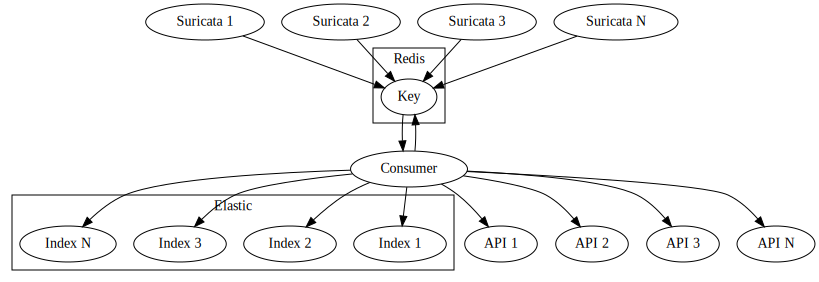

In [93]:
from graphviz import Digraph, Source
dot = Digraph(comment='redis-list')

dot.attr(compound='true')
dot.format = 'svg'
dot.landscape = True

example_range = [1,2,3,"N"]

with dot.subgraph(name="cluster_redis") as redis:
    redis.attr(label="Redis")
    redis.node("r", "Key")
    
for i in example_range:
    dot.node("s-{}".format(i), "Suricata {}".format(i))
    dot.edge("s-{}".format(i), "r")

dot.node("c", "Consumer")
dot.edge("r", "c")
dot.edge("c", "r")

with dot.subgraph(name="cluster_elastic") as elastic:
    elastic.attr(label="Elastic")
    for i in example_range:
        elastic.node("e-{}".format(i), "Index {}".format(i))
        dot.edge("c", "e-{}".format(i))
        
for i in example_range:
    dot.node("a-{}".format(i), "API {}".format(i))
    dot.edge("c", "a-{}".format(i))

Source(dot)

# Local redis and single subscriber

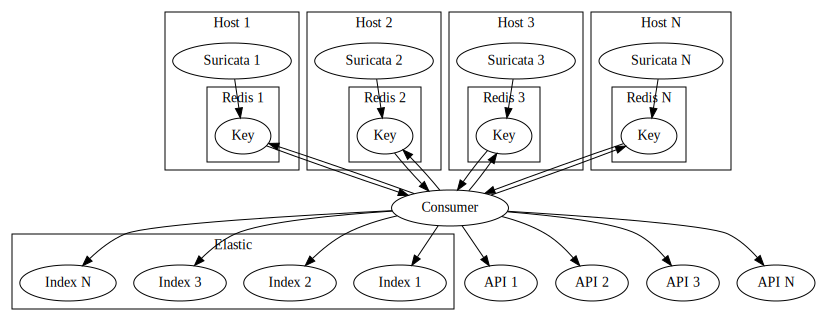

In [94]:
from graphviz import Digraph, Source
dot = Digraph(comment='redis-list')

dot.attr(compound='true')
dot.format = 'svg'
dot.landscape = True

example_range = [1,2,3,"N"]

dot.node("c", "Consumer")

for i in example_range:
    with dot.subgraph(name="cluster_host_{}".format(i)) as host:
        host.attr(label="Host {}".format(i))

        with host.subgraph(name="cluster_redis_{}".format(i)) as redis:
            redis.attr(label="Redis {}".format(i))
            redis.node("r-{}".format(i), "Key")
    
        host.node("s-{}".format(i), "Suricata {}".format(i))
        dot.edge("s-{}".format(i), "r-{}".format(i))
    
        dot.edge("r-{}".format(i), "c")
        dot.edge("c", "r-{}".format(i))

with dot.subgraph(name="cluster_elastic") as elastic:
    elastic.attr(label="Elastic")
    for i in example_range:
        elastic.node("e-{}".format(i), "Index {}".format(i))
        dot.edge("c", "e-{}".format(i))

for i in example_range:
    dot.node("a-{}".format(i), "API {}".format(i))
    dot.edge("c", "a-{}".format(i))
        
Source(dot)

# Redis pubsub and multiple consumers

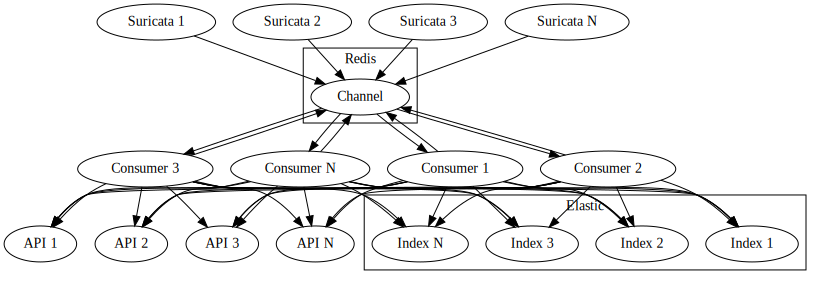

In [95]:
from graphviz import Digraph, Source
dot = Digraph(comment='redis-list')

dot.attr(compound='true')
dot.format = 'svg'
dot.landscape = True

example_range = [1,2,3,"N"]

with dot.subgraph(name="cluster_redis") as redis:
    redis.attr(label="Redis")
    redis.node("r", "Channel")
    
for i in example_range:
    dot.node("s-{}".format(i), "Suricata {}".format(i))
    dot.edge("s-{}".format(i), "r")

for i in example_range:
    dot.node("c-{}".format(i), "Consumer {}".format(i))
    dot.edge("r", "c-{}".format(i))
    dot.edge("c-{}".format(i), "r")

with dot.subgraph(name="cluster_elastic") as elastic:
    elastic.attr(label="Elastic")
    
    for i in example_range:
        elastic.node("e-{}".format(i), "Index {}".format(i))
        for j in example_range:
            dot.edge("c-{}".format(j), "e-{}".format(i))
        
    for i in example_range:
        dot.node("a-{}".format(i), "API {}".format(i))
        for j in example_range:
            dot.edge("c-{}".format(j), "a-{}".format(i))
    
Source(dot)

# Syslog

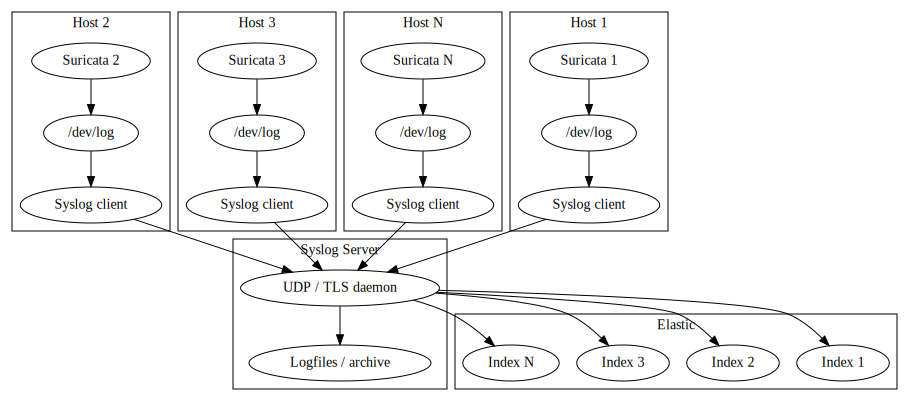

In [97]:
from graphviz import Digraph, Source
dot = Digraph(comment='redis-list')

dot.attr(compound='true')
dot.format = 'svg'
dot.landscape = True

example_range = [1,2,3,"N"]

for i in example_range:
    with dot.subgraph(name="cluster_host_{}".format(i)) as host:
        host.attr(label="Host {}".format(i))
        
        host.node("d-{}".format(i), "/dev/log")
    
        host.node("s-{}".format(i), "Suricata {}".format(i))
        host.edge("s-{}".format(i), "d-{}".format(i))
        
        host.node("l-{}".format(i), "Syslog client")
        host.edge("d-{}".format(i), "l-{}".format(i))
        
with dot.subgraph(name="cluster_syslog_server".format(i)) as syslog:
    syslog.attr(label="Syslog Server".format(i))
    syslog.node("s", "UDP / TLS daemon")
    syslog.node("f", "Logfiles / archive")
    syslog.edge("s", "f")
    for i in example_range:
        dot.edge("l-{}".format(i), "s")

with dot.subgraph(name="cluster_elastic") as elastic:
    elastic.attr(label="Elastic")
    for i in example_range:
        elastic.node("e-{}".format(i), "Index {}".format(i))
        dot.edge("s", "e-{}".format(i))
        
Source(dot)

# Kafka

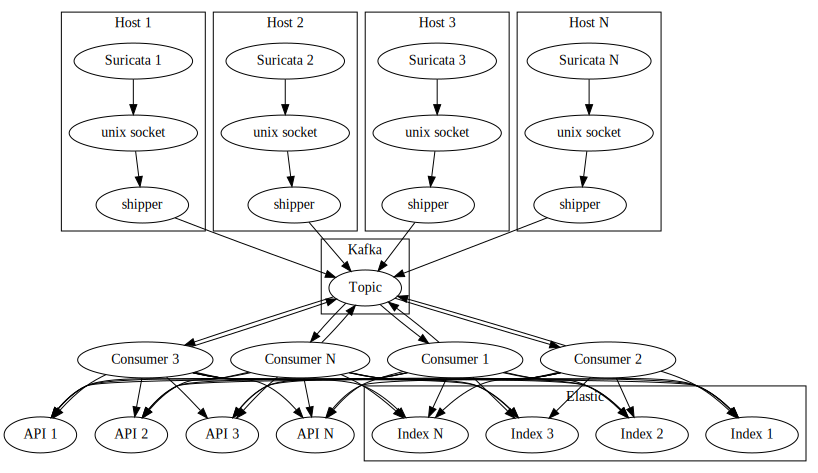

In [104]:
from graphviz import Digraph, Source
dot = Digraph(comment='redis-list')

dot.attr(compound='true')
dot.format = 'svg'
dot.landscape = True

example_range = [1,2,3,"N"]

for i in example_range:
    with dot.subgraph(name="cluster_host_{}".format(i)) as host:
        host.attr(label="Host {}".format(i))
        
        host.node("d-{}".format(i), "unix socket")
    
        host.node("s-{}".format(i), "Suricata {}".format(i))
        host.edge("s-{}".format(i), "d-{}".format(i))
        
        host.node("l-{}".format(i), "shipper")
        host.edge("d-{}".format(i), "l-{}".format(i))

with dot.subgraph(name="cluster_kafka") as kafka:
    kafka.attr(label="Kafka")
    kafka.node("r", "Topic")

for i in example_range:
    dot.edge("l-{}".format(i), "r")
    
for i in example_range:
    dot.node("c-{}".format(i), "Consumer {}".format(i))
    dot.edge("r", "c-{}".format(i))
    dot.edge("c-{}".format(i), "r")
    
with dot.subgraph(name="cluster_elastic") as elastic:
    elastic.attr(label="Elastic")
    
    for i in example_range:
        elastic.node("e-{}".format(i), "Index {}".format(i))
        for j in example_range:
            dot.edge("c-{}".format(j), "e-{}".format(i))
        
    for i in example_range:
        dot.node("a-{}".format(i), "API {}".format(i))
        for j in example_range:
            dot.edge("c-{}".format(j), "a-{}".format(i))
    
Source(dot)